In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [102]:
!pip install sklearn
import sklearn

You should consider upgrading via the 'C:\Users\Dell\anaconda3\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 8.8 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=62acab59242e16440dce8b0ad3d0096c74596cbc95b5c07a1a01587bf63d052d
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
df = pd.read_csv('train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df = df.drop_duplicates()

In [4]:
df.shape

(7109, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace=True)

In [8]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [90]:
#dropping the unneccesary columns
df.drop(columns=['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace = True)

In [10]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

In [91]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


In [12]:
# IQR_INT_SQFT = Q3-Q1 = 751
# OUTLIER = Q3 + 1.5*IQR = 2870.5
# OUTLIER2 = Q1 - 1.5*IQR = -133.5

# IQR_DIST_MAINROAD= Q3-Q1 = 98
# OUTLIER = Q3 + 1.5*IQR = 295
# OUTLIER2 = Q1 - 1.5*IQR = -97

# IQR_N_BEDROOM= Q3-Q1 = 1
# OUTLIER = Q3 + 1.5*IQR = 3.5
# OUTLIER2 = Q1 - 1.5*IQR = -0.5

# IQR_N_BATHROOM= Q3-Q1 = 0
# OUTLIER = Q3 + 1.5*IQR = 1
# OUTLIER2 = Q1 - 1.5*IQR = 1

# IQR_N_ROOM= Q3-Q1 = 1
# OUTLIER = Q3 + 1.5*IQR = 5
# OUTLIER2 = Q1 - 1.5*IQR = 1.5

# IQR_SALES_PRICE= Q3-Q1 = 4721800
# OUTLIER = Q3 + 1.5*IQR = 5911200
# OUTLIER2 = Q1 - 1.5*IQR = 1189400

In [13]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [14]:
#Correct the Spelling Mistake

In [15]:
df['AREA'] = df['AREA'].replace(['Chrompt','Chrmpet','Chormpet','TNagar','Karapakam','Ana Nagar','Velchery','Ann Nagar','Adyr','KKNagar'],
                     ['Chrompet','Chrompet','Chrompet','T Nagar','Karapakkam','Anna Nagar','Velachery','Anna Nagar','Adyar','KK Nagar'])

In [16]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [17]:
df['SALE_COND'] = df['SALE_COND'].replace(['Adj Land','Ab Normal','Partiall','PartiaLl'],
                                    ['AdjLand','AbNormal','Partial','Partial'])

In [18]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [19]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace(['Noo'],['No'])

In [20]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [21]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace(['Other','Comercial'],
                                              ['Others','Commercial'])

In [22]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [23]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr ','All Pub'],
                                                      ['No Sewage','No Sewer','AllPub'])

In [24]:
df.UTILITY_AVAIL.value_counts()

AllPub       1887
No Sewage    1871
No Sewer     1829
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

In [25]:
df['STREET'] = df['STREET'].replace(['Pavd','NoAccess'],
                                        ['Paved','No Access'])

In [26]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [27]:
#Exploratory Data Analysis

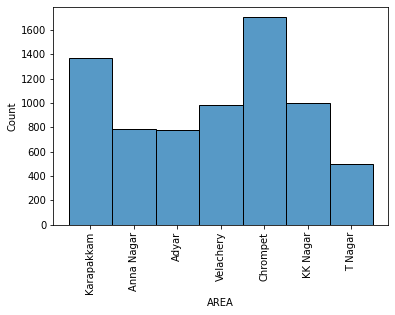

In [28]:
sns.histplot(df['AREA'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

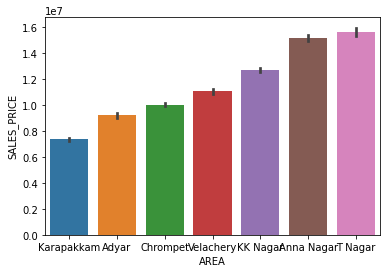

In [29]:
sns.barplot(x = df['AREA'],y=df['SALES_PRICE'],order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

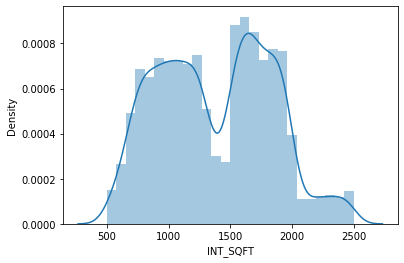

In [30]:
sns.distplot(df['INT_SQFT'])

<function matplotlib.pyplot.show(close=None, block=None)>

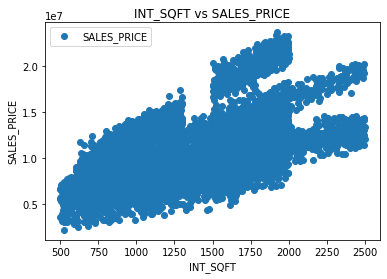

In [33]:
df.plot(x = "INT_SQFT",y = "SALES_PRICE", style = "o")
plt.title("INT_SQFT vs SALES_PRICE")
plt.xlabel("INT_SQFT")
plt.ylabel("SALES_PRICE")
plt.show

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

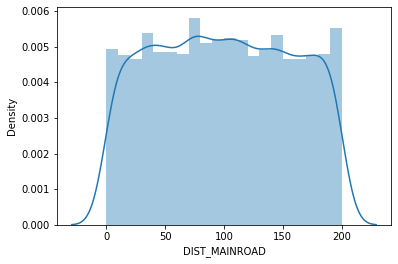

In [34]:
sns.distplot(df['DIST_MAINROAD'])

In [ ]:
#Deriving New features

In [65]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2258718761.py:1: UserWarning: Parsing '19-12-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2258718761.py:1: UserWarning: Parsing '13-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2258718761.py:1: UserWarning: Parsing '13-03-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2258718761.py:1: UserWarning: Parsing '22-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE

In [66]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2037570131.py:1: UserWarning: Parsing '15-05-1967' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2037570131.py:1: UserWarning: Parsing '22-12-1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2037570131.py:1: UserWarning: Parsing '18-03-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13028\2037570131.py:1: UserWarning: Parsing '13-10-1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_BUILD'] = pd.to_datetime(df['DA

In [69]:
df.dtypes.value_counts()

object            8
int64             8
float64           4
datetime64[ns]    2
int32             2
dtype: int64

In [70]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,BUILD_YEAR
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979


In [71]:
df['AGE'] = df['SALE_YEAR']- df['BUILD_YEAR']

In [72]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,BUILD_YEAR,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [74]:
df = df.drop(['DATE_SALE','DATE_BUILD','SALE_YEAR','BUILD_YEAR'],axis=1)

In [75]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

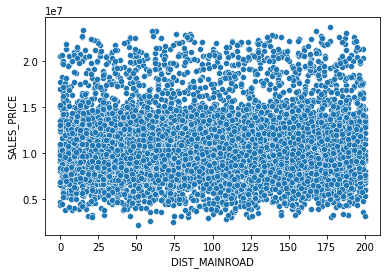

In [49]:
sns.scatterplot(x= df["DIST_MAINROAD"],y= df["SALES_PRICE"])

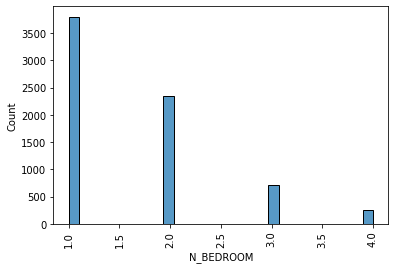

In [38]:
sns.histplot(df['N_BEDROOM'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

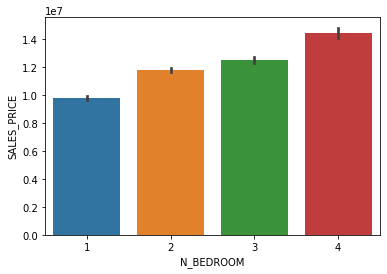

In [42]:
sns.barplot(x=df["N_BEDROOM"] , y= df["SALES_PRICE"])

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

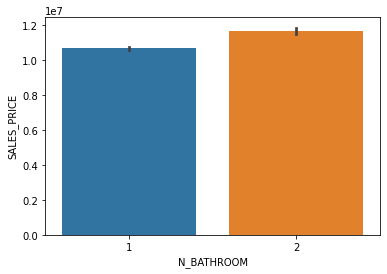

In [43]:
sns.barplot(x= df["N_BATHROOM"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

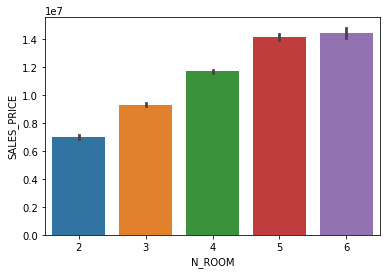

In [44]:
sns.barplot(x=df["N_ROOM"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

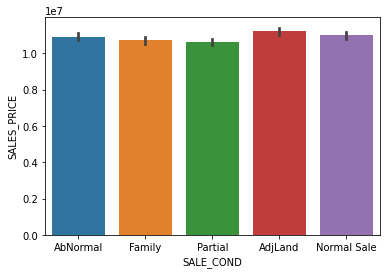

In [45]:
sns.barplot(x= df["SALE_COND"], y=df["SALES_PRICE"])

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

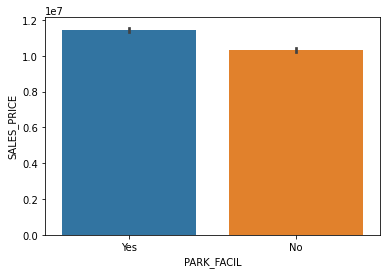

In [46]:
sns.barplot(x= df["PARK_FACIL"], y=df["SALES_PRICE"])

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

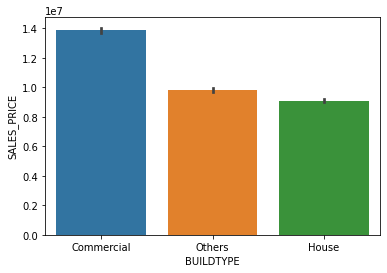

In [47]:
sns.barplot(x= df["BUILDTYPE"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

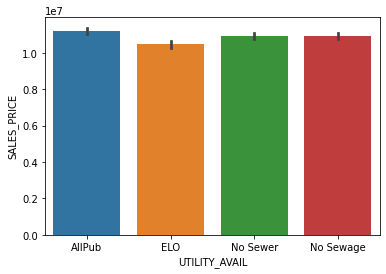

In [48]:
sns.barplot(x= df["UTILITY_AVAIL"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

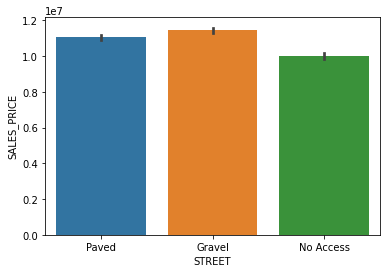

In [50]:
sns.barplot(x= df["STREET"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

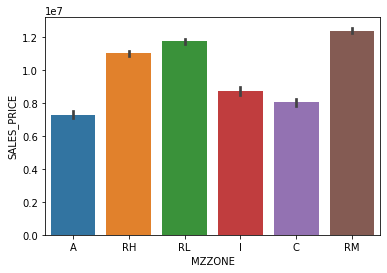

In [51]:
sns.barplot(x= df["MZZONE"], y= df["SALES_PRICE"])

<AxesSubplot:xlabel='AGE', ylabel='SALES_PRICE'>

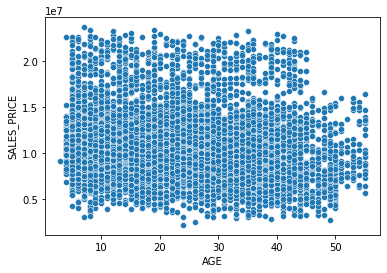

In [76]:
sns.scatterplot(x= df['AGE'], y= df["SALES_PRICE"])

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_BEDROOM', ylabel='Density'>

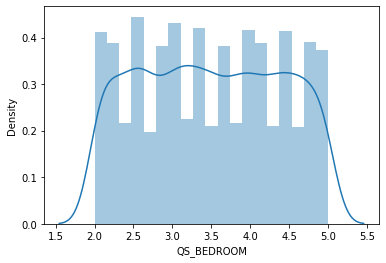

In [78]:
sns.distplot(df['QS_BEDROOM'])

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

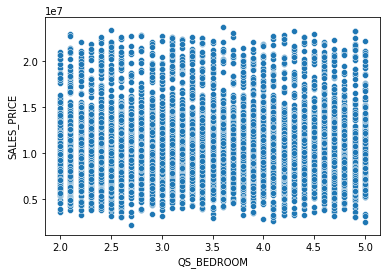

In [83]:
sns.scatterplot(data=df,x = 'QS_BEDROOM',y = 'SALES_PRICE')

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

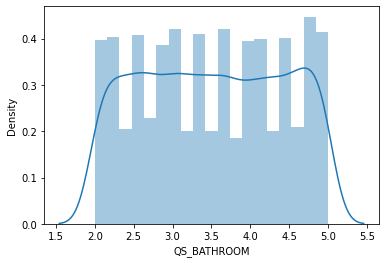

In [81]:
sns.distplot(df['QS_BATHROOM'])

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

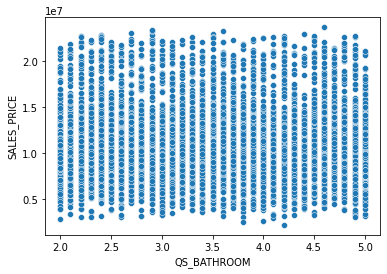

In [84]:
sns.scatterplot(data=df,x='QS_BATHROOM',y='SALES_PRICE')

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

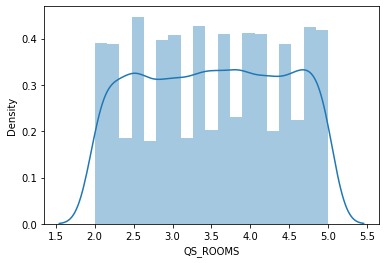

In [85]:
sns.distplot(df['QS_ROOMS'])

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

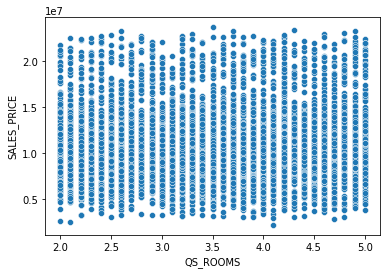

In [86]:
sns.scatterplot(data=df,x = 'QS_ROOMS',y = 'SALES_PRICE')

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

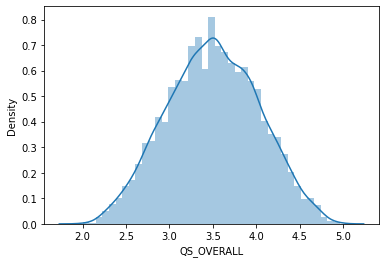

In [87]:
sns.distplot(df['QS_OVERALL'])

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

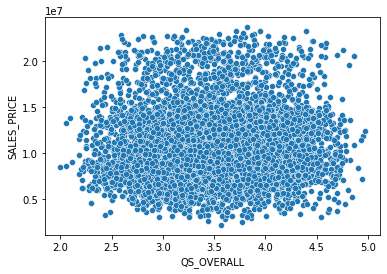

In [88]:
sns.scatterplot(data=df,x = 'QS_OVERALL',y = 'SALES_PRICE')

In [92]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,-0.017971
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,0.012517
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,-0.118842


In [94]:
df.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020485
SALES_PRICE      1.000000
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

In [ ]:
#Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df["AREA"]= df["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})
df["SALE_COND"]= df["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':2,'No':1})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':1,'No Sewage':3,'No Sewer':4,'AllPub':6})
df['STREET'] = df['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})
df["MZZONE"]= df["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})
dummies1 = pd.get_dummies(df["BUILDTYPE"])
df= pd.concat([df,dummies1], axis=1)
df = df.drop('BUILDTYPE',axis=1)
df = df.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [107]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,2,6,3,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,1,6,4,5,21717770,11,1,0,0
2,2,909,1,1,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,3,2,5,2,1,4,3,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,2,6,4,2,7406250,30,0,0,1


In [109]:
x = df.drop('SALES_PRICE',axis = 1)
y = df['SALES_PRICE']

In [110]:
x.shape,y.shape

((7109, 14), (7109,))

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=0)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [113]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4976, 14), (2133, 14), (4976,), (2133,))

In [ ]:
#LinearRegression

In [114]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9223401712322274

In [115]:
y_pred= lr.predict(x_test)
y_pred

array([14100172.39530339, 13600460.39530339, 18482892.39530339, ...,
       14089932.39530339,  8416972.39530339,  5174988.39530339])

In [116]:
lr.intercept_

10938060.395303395

In [117]:
lr.coef_

array([ 1.04726663e+06,  6.76564955e+05, -1.28738588e+06,  1.11136771e+05,
        1.77435402e+06,  2.18534424e+05,  5.23924627e+05,  4.41336533e+04,
        3.96417049e+05,  8.65090415e+05, -2.14923633e+05,  1.80220079e+19,
        1.80557320e+19,  1.77832776e+19])

In [118]:
coef_df= pd.DataFrame(lr.coef_, x.columns, columns=["Co-efficient"])  
coef_df

,Co-efficient
AREA,1.047267e+06
INT_SQFT,6.765650e+05
N_BEDROOM,-1.287386e+06
N_BATHROOM,1.111368e+05
N_ROOM,1.774354e+06
SALE_COND,2.185344e+05
PARK_FACIL,5.239246e+05
UTILITY_AVAIL,4.413365e+04
STREET,3.964170e+05
MZZONE,8.650904e+05


In [119]:
from sklearn.metrics import r2_score
ac= r2_score(y_test,lr.predict(x_test))
ac

0.9223401712322274

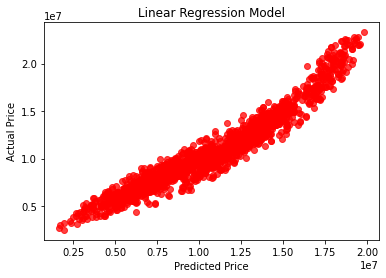

In [120]:
plt.scatter(y_pred,y_test,alpha=0.75,color='red')
plt.title('Linear Regression Model')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [121]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.9223401712322274


In [ ]:
#RandomForestRegressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
random = RandomForestRegressor(n_estimators=400).fit(x_train,y_train)
rf_pred = random.predict(x_test)
rf_reg_score = random.score(x_test,y_test)
rf_reg_score

0.9891875031369711

In [ ]:
#XG Boost regressor Model

In [125]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [128]:
import xgboost as xgb
from xgboost import XGBRegressor
xx = XGBRegressor().fit(x_train, y_train)
xgb_reg_pred = xx.predict(x_test)
xgb_score = xx.score(x_test, y_test)
xgb_score

0.9962660947765638

In [129]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(x_train,y_train)
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(x.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Commercial', 0.47137),
 ('AREA', 0.33266),
 ('N_ROOM', 0.07805),
 ('MZZONE', 0.03037),
 ('House', 0.02153),
 ('PARK_FACIL', 0.02135),
 ('INT_SQFT', 0.01853),
 ('STREET', 0.01062),
 ('N_BATHROOM', 0.00634),
 ('N_BEDROOM', 0.00292),
 ('SALE_COND', 0.00255),
 ('AGE', 0.00154),
 ('Others', 0.00127),
 ('UTILITY_AVAIL', 0.0009)]

In [ ]:
The r2 score of Linear Regression model is : 0.9223401712322274
Random Forest model is : 0.9891875031369711
XGB regressor model is : 0.9962660947765638

XGB-Regressor is the suitable model for this dataset.